In [37]:
import numpy as np
import pandas as pd
import os
import math

In [51]:
root_dir = os.getcwd()
data_final = pd.read_csv(os.path.join(root_dir, "data", "odds", "NCAAF_Odds.csv"))
#data_final = data_final.dropna(subset=['Spread_Pinnacle'])
spreads = data_final.filter(regex="Spread_")
m = spreads.mean(axis=1)
for i, col in enumerate(spreads):
    # using i allows for duplicate columns
    # inplace *may* not always work here, so IMO the next line is preferred
    # df.iloc[:, i].fillna(m, inplace=True)
    spreads.iloc[:, i] = spreads.iloc[:, i].fillna(m)

spreads['target_margin'] = data_final['HomeScore'] - data_final['AwayScore']

spreads.dropna(axis=0, inplace=True)




X_train, X_test, y_train, y_test = train_test_split(spreads.drop(['target_margin'], axis=1), spreads['target_margin'], test_size=0.33, random_state=42)
#X_train = spreads.drop(['target_margin']
#y_train = data_final[(data_final['Season'] <2016) & (data_final['Week'] >= 4) & ((data_final['HomeConf'] != 'NotD1') | (data_final['VisConf'] != 'NotD1')) ]['target_margin']
#X_test = data_final[(data_final['Season'] >= 2016) & (data_final['Week'] >= 4) & ((data_final['HomeConf'] != 'NotD1') | (data_final['VisConf'] != 'NotD1')) ][['HomeBCSSOS', 'HomeRPI', 'AwayBCSSOS', 'AwayRPI', 'HomeCombined', 'AwayCombined']]
#y_test = data_final[(data_final['Season'] >= 2016) & (data_final['Week'] >= 4) & ((data_final['HomeConf'] != 'NotD1') | (data_final['VisConf'] != 'NotD1')) ]['target_margin']


C:\Users\chris\Anaconda3\lib\site-packages\pandas\core\indexing.py:621: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\chris\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stabl

In [49]:
spreads

,Spread_Mirage,Spread_Pinnacle,Spread_Sportsbet,Spread_Westgate,Spread_Station,Spread_SIA,Spread_SBG,Spread_BetUS,target_margin
0,2.500000,2.0,2.0,2.50,2.500000,2.000000,2.000000,2.000000,-7
1,-14.500000,-14.0,-14.0,-15.00,-14.500000,-15.000000,-14.500000,-14.500000,3
2,18.375000,18.0,18.0,18.50,18.375000,19.000000,18.375000,18.375000,-2
3,-7.000000,-7.0,-7.5,-7.00,-7.000000,-7.000000,-7.000000,-7.000000,-17
4,14.000000,14.0,14.0,14.00,14.083333,14.500000,14.083333,14.000000,-42
5,-24.000000,-24.0,-24.0,-24.00,-24.000000,-24.000000,-24.000000,-24.000000,35
6,15.000000,15.5,15.5,15.50,15.600000,16.500000,15.600000,15.600000,-38
8,-14.000000,-14.0,-14.0,-14.00,-14.000000,-14.000000,-14.000000,-14.000000,7
9,-10.500000,-10.5,-10.5,-10.50,-10.500000,-10.500000,-10.500000,-10.500000,29
10,-5.500000,-6.5,-6.5,-6.50,-6.500000,-6.000000,-6.000000,-6.500000,4


In [11]:
from sklearn.linear_model import *
from sklearn.model_selection import *
from sklearn.metrics import *

In [52]:
from sklearn import svm
from sklearn import tree

lm = LinearRegression().fit(X_train, y_train)
predictions = lm.predict(X_test)
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

model = Ridge (alpha = 5000).fit(X_train, y_train)
predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))


257.33746872248196
0.5128319570205203
257.78599105118144
0.511982855075942


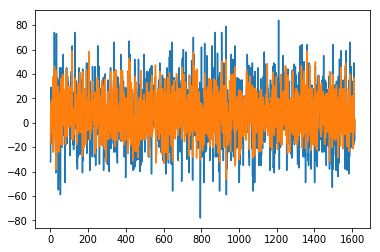

In [53]:
import matplotlib.pyplot as plt

ys = y_test.tolist()
plt.plot(range(0, len(ys)), ys)
plt.plot(range(0, len(predictions)), predictions)
plt.show()